# Nivell 1

## Exercici 1

#### Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [1]:
import pandas as pd

In [2]:
df_tour_winners = pd.read_csv('C:/Users/xizes/tdf_winners.csv')

In [3]:
df_tour_winners.head(1)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France


**Mostra aleatòria simple**

Simple random sample of 32 elements from original dataframe.

In [4]:
df_simple_sample = df_tour_winners.sample(n=32)

In [5]:
df_simple_sample.shape

(32, 19)

**Mostra sistemàtica**

Sistematic sample using step=3.

In [6]:
df_sistematic_sample = df_tour_winners.iloc[::3]

In [7]:
df_sistematic_sample.shape

(36, 19)

# Nivell 2
## Exercici 2
#### Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

**Mostra Estratificada**



In [8]:
#Divide df into two groups 
df_strata_1 = df_tour_winners.iloc[::2]
df_strata_2 = df_tour_winners.iloc[1::2]

In [9]:
#Check the similarity to validate the homogenity of the two groups
df_strata_1.describe()

,edition,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,53.00000,53.000000,49.000000,49.000000,53.000000,53.000000,32.000000,33.000000,53.000000
mean,53.00000,4209.235849,126.109416,0.284433,2.735849,10.226415,1.779688,69.121212,28.320755
std,30.88689,713.317228,41.478473,0.542260,1.962641,4.834338,0.057557,6.725686,3.203205
min,1.00000,2428.000000,82.086667,0.008889,0.000000,1.000000,1.620000,57.000000,22.000000
25%,27.00000,3660.500000,92.552222,0.050833,1.000000,7.000000,1.740000,65.000000,26.000000
50%,53.00000,4173.000000,114.531667,0.101667,2.000000,11.000000,1.770000,68.000000,29.000000
75%,79.00000,4504.000000,141.383333,0.203333,4.000000,14.000000,1.820000,74.000000,30.000000
max,105.00000,5560.000000,231.120833,2.989167,8.000000,21.000000,1.900000,88.000000,34.000000


In [10]:
df_strata_2.describe()

,edition,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,53.00000,53.000000,49.000000,49.000000,53.000000,53.000000,34.000000,34.000000,53.000000
mean,54.00000,4214.892453,125.400550,0.251020,2.735849,11.358491,1.777941,69.382353,27.113208
std,30.88689,701.949681,42.066956,0.404513,1.733726,5.731473,0.057302,6.559817,3.423114
min,2.00000,2428.000000,82.950000,0.002222,0.000000,1.000000,1.610000,52.000000,19.000000
25%,28.00000,3635.000000,92.749722,0.033889,1.000000,6.000000,1.750000,64.500000,25.000000
50%,54.00000,4138.000000,115.461667,0.067778,2.000000,13.000000,1.770000,70.000000,27.000000
75%,80.00000,4669.000000,142.792222,0.254167,4.000000,15.000000,1.820000,74.750000,29.000000
max,106.00000,5745.000000,238.740278,2.270556,7.000000,22.000000,1.860000,80.000000,36.000000


In [11]:
#Extract the sample (10%) from each strata
df_stratified_strata_1 = df_strata_1.sample(n=round(len(df_strata_1)*.1))
df_stratified_strata_2 = df_strata_2.sample(n=round(len(df_strata_2)*.1))

In [12]:
print('Sample from strata 1:', df_stratified_strata_1.shape[0])
print('Sample from strata 2:', df_stratified_strata_2.shape[0])

Sample from strata 1: 5
Sample from strata 2: 5


**SMOTE (Synthetic Minority Oversampling Technique)**

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

Source: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


In [13]:
#conda install -c conda-forge imbalanced-learn

In [152]:
import seaborn as sns
import numpy as np
from collections import Counter
#from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [77]:
df_tour_winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   106 non-null    float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

<AxesSubplot:xlabel='time_overall', ylabel='age'>

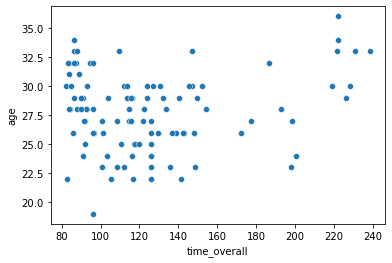

In [225]:
#Check correlation between time and age
sns.scatterplot(x=df_tour_winners['time_overall'],y=df_tour_winners['age'])

In [34]:
#Fill nan values in 'time_overall' column with the mean of this column
df_tour_winners['time_overall'].fillna(value=df_tour_winners['time_overall'].mean(), inplace=True)

### Small explanation

1 - I don´t think this is the best dataset to perform the SMOTE technique, because it´s not particularly imbalanced. So What I did was to create an imbalanced condition using the 'time_overall' column and the condition below 180 (equal 0) and above 180 (equal 1) into a new column named 'time_over_180'.

2 - I created a new dataframe using the numeric columns 'age', 'stage_wins' and 'time_over_180' (the other numeric columnswere  issing too uch data or weren´t appropriate for the model). I than normalized the X values and split them between train and test. I ran a Random Forest Classifier on these data and tested the results.

3 - I did all over again after using the SMOTE technique.

#### ML without SMOTE

In [61]:
#Feature engineer overal_time above 180 = 1, below 180 = 0
df_tour_winners['time_over_180'] = ''

for e, t in enumerate(df_tour_winners['time_overall']):
    if t <= 180:
        df_tour_winners['time_over_180'].iloc[e] = float(0)
    elif t > 180:
        df_tour_winners['time_over_180'].iloc[e] = float(1)
            

C:\Users\xizes\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [226]:
df_smote = df_tour_winners[['age', 'stage_wins', 'time_over_180']]

In [229]:
#df_smote.head(50)

In [81]:
#Iniciate normalizer
mms = MinMaxScaler()

In [231]:
#Normalize integer values between 0 and 1
scaled_data = mms.fit_transform(df_smote[['age', 'stage_wins']])

In [233]:
#Create df with scaled values
df_smote_scaled = pd.DataFrame(df_smote_mms, columns=['age', 'stage_wins'])

In [237]:
#Merge the scaled df with the prediction column 'time_over_180'
df_smote_final = pd.concat([df_smote_scaled, df_smote['time_over_180']], axis=1)

In [190]:
#Separating features for prediction
X = df_smote_final.drop('time_over_180', axis=1).astype(float)
y = df_smote_final['time_over_180'].astype(float)

In [214]:
#Amount of each feature. Notice the lower presence of value 1 on the dataset. This will be out target on the SMOTE technique.
Counter(y)

Counter({0.0: 93, 1.0: 13})

In [192]:
#Train, test split
#Approximate the amount of values '1' both in test and train sets using random_state = 6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [240]:
#Check the amount of values '1' (percentile) on both datasets
print(np.round(y_train.value_counts(normalize=True)[1] * 100, 2))
print(np.round(y_test.value_counts(normalize=True)[1] * 100, 2))

12.16
12.5


In [241]:
#Iniciate model
model = RandomForestClassifier()

In [242]:
#Fit datasets to the model and make predictions
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [243]:
#Test the results for accuracy
accuracy_score(y_test, preds)

0.875

In [244]:
#Test the results for recall
recall_score(y_test, preds)

0.0

In [245]:
confusion_matrix(y_test, preds)

array([[28,  0],
       [ 4,  0]], dtype=int64)

#### ML with SMOTE - same steps as above, only added the SMOTE function

In [246]:
#Iniciate SMOTE oversampling
oversample = SMOTE(random_state=6)

In [249]:
X_rsmpl, y_rsmpl = oversample.fit_resample(X, y)

In [250]:
#Now we have the same amount of 0 and 1, after using SMOTE
Counter(y_rsmpl)

Counter({0.0: 93, 1.0: 93})

In [321]:
X_train_rsmpl, X_test_rsmpl, y_train_rsmpl, y_test_rsmpl = train_test_split(X_rsmpl, y_rsmpl, test_size=0.3, random_state=6)

In [254]:
print(np.round(y_train_rsmpl.value_counts(normalize=True)[1] * 100, 2))
print(np.round(y_test_rsmpl.value_counts(normalize=True)[1] * 100, 2))

50.77
48.21


In [344]:
model.fit(X_train_rsmpl, y_train_rsmpl)
preds_rsmpl = model.predict(X_test_rsmpl)

In [345]:
accuracy_score(y_test_rsmpl, preds_rsmpl)

0.8571428571428571

In [346]:
recall_score(y_test_rsmpl, preds_rsmpl)

0.9259259259259259

In [347]:
confusion_matrix(y_test_rsmpl, preds_rsmpl)

array([[23,  6],
       [ 2, 25]], dtype=int64)

### As we can see, we got better results after using the SMOTE technique.

# Nivell 3
## Exercici 3
#### Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [348]:
import random

In [400]:
#Usually reservoir sampling is made using an infinite (or of lenght not known) stream of data,
#but in our case I´ll use the same dataframe as before in order to follow the instructions

def samplingReservoir(df, k):
    #list that will hold the index numbers form the original df taken randomly with the same probability
    reservoir = []
    
    #Loop through the elements of df...
    for i, element in enumerate(df.index):
        #...add elements until reach the choosen lenght of the sample.
        if i+1 <= k:
            reservoir.append(element)
        #After complete the number of elements, keep cycling through the original df...
        else:
            #...compare the probability of that element with a random generated number (between 0 and 1)...
            probability = k/(i+1)
            random_number = random.random()
            #...if the random number is smaller than the probability, a random element will be substituted by the current one
            if random_number < probability:
                # Select item in stream and remove one of the k items already selected
                reservoir[random.choice(range(0,k))] = element
    return df.iloc[reservoir]


In [401]:
a = samplingReservoir(df_tour_winners,30)

In [402]:
a

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,time_over_180
66,67,1980-06-26,Joop Zoetemelk,TI–Raleigh–Creda,3842.0,109.320556,0.101667,2,10,1.73,68.0,33,1946-12-03,NaN,Hendrik Gerardus Joseph Zoetemelk,Joop,The Hague,Netherlands,Netherlands,0
35,36,1949-06-30,Fausto Coppi,Italy,4808.0,149.680278,0.169444,3,5,1.77,68.0,29,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\n(Champion of Champ...",Castellania,Italy,Italy,0
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,125.754983,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,0
49,50,1963-06-23,Jacques Anquetil,Saint-Raphaël–Gitane–R. Geminiani,4138.0,113.501389,0.050833,4,5,1.76,70.0,29,1934-01-08,1987-11-18,NaN,"Monsieur Chrono, Maître Jacques",Mont-Saint-Aignan,France,France,0
37,38,1951-07-04,Hugo Koblet,Switzerland,4690.0,142.337222,0.372778,5,11,NaN,NaN,26,1925-03-21,1964-11-06,NaN,"Beautiful Hugo, Le pédaleur de charme",Zürich,Switzerland,Switzerland,0
88,89,2002-07-06,Lance Armstrong,U.S. Postal Service,3272.0,82.086667,0.118611,4,11,1.77,75.0,30,1971-09-18,NaN,Lance Edward Armstrong,"Le Boss, Big Tex",Plano,USA,United States,0
55,56,1969-06-28,Eddy Merckx,Faema,4117.0,116.267222,0.288056,6,18,1.82,74.0,24,1945-06-17,NaN,Édouard Louis Joseph Merckx,The Cannibal,Meensel-Kiezegem,Belgium,Belgium,0
87,88,2001-07-07,Lance Armstrong,U.S. Postal Service,3458.0,86.291111,0.101667,4,8,1.77,75.0,29,1971-09-18,NaN,Lance Edward Armstrong,"Le Boss, Big Tex",Plano,USA,United States,0
44,45,1958-06-26,Charly Gaul,Luxembourg,4319.0,116.984722,0.050833,4,2,1.73,64.0,25,1932-12-08,2005-12-06,NaN,Angel of the Mountains,Pfaffenthal,Luxembourg,Luxembourg,0
73,74,1987-07-01,Stephen Roche,Carrera Jeans–Vagabond,4231.0,115.461667,0.011111,1,3,1.75,74.0,27,1959-11-28,NaN,NaN,NaN,Dundrum,Ireland,Ireland,0
